In [3]:
#temporal subtraction simple

import cv2
cap = cv2.VideoCapture("wiiplay.mp4")
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
cur_frame, prev_frame = None, None
while True:
    ret, frame = cap.read()
    prev_frame = cur_frame
    cur_frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    if prev_frame is not None:
        sub_frame = cv2.absdiff(cur_frame , prev_frame)
        cv2.imshow('temporal subtraction', sub_frame)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()


## Homework 1
1. Read continuous images from <i>WiiPlay.mp4</i> video file. (with level number the same as the last two digits of your student id)
2. Convert each image to gray-scale.
3. Perform <b>Temporal Subtraction</b>. i.e., <i>G<sub>t</sub>=abs(I<sub>t</sub> - I<sub>t-1</sub>)</i> where <i>I<sub>t</sub></i> is the captured image at time instant <i>t</i>.
4. Apply a threshold to detect motion areas, i.e.,  <i>D<sub>t</sub>(x,y)=1 if G<sub>t</sub>(x,y)>Threshold, else 0</i>.
5. Perform 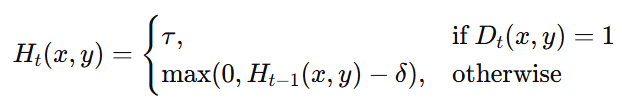
6. Scale values in <i>H<sub>t</sub>(x,y)</i>to the range [0,255] for better visualization.
7. Loop over time and Show the captured image <i>I<sub>t</sub></i>, the temporal subtracion image <i>G<sub>t</sub></i>, the thresholding image <i>D<sub>t</sub></i>, the history image <i>H<sub>t</sub></i>.
8. Compare the difference between the temporal subtracion image <i>G<sub>t</sub></i> and the history image <i>H<sub>t</sub></i>.
9. Adjust the <i>Threshold</i> value and observe the result.
10. Adjust the <i>Tau</i> value and observe the result.
11. Adjust the <i>Delta</i> value and observe the result.
12. Write down your observation and comparison at the end of your code by adding an individual cell in Jupyter.
13. Upload your Jupyter code file (*.ipynb)


In [29]:
#2:25
import cv2
import numpy as np

#1. Read continuous images from WiiPlay.mp4 video file. 
cap = cv2.VideoCapture('WiiPlay.mp4')
if not cap.isOpened():
    raise IOError("Cannot open the video file")
fps = cap.get(cv2.CAP_PROP_FPS)
time = 2 * 60 + 25
target_frame = fps * time
cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame)
ret, img = cap.read()
img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
height , width = img.shape[:2]
cur_img, prev_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), None
Ht = np.zeros((height, width), dtype=np.uint8)
while True:
    prev_img = cur_img
    ret, cur_img = cap.read()
    cur_img = cv2.resize(cur_img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
    cv2.imshow('It', cur_img)
#2. Convert each image to gray-scale.
    cur_img = cv2.cvtColor(cur_img, cv2.COLOR_BGR2GRAY)
#3. Perform Temporal Subtraction. i.e., Gt=abs(It - It-1) where It is the captured image at time instant t.
    Gt = cv2.absdiff(cur_img, prev_img)
    cv2.imshow('Gt', Gt)
#4. Apply a threshold to detect motion areas, i.e., Dt(x,y)=1 if Gt(x,y)>Threshold, else 0
    threshold = 15
    tau = 200
    ret, Dt = cv2.threshold(Gt, threshold, 255, cv2.THRESH_BINARY) # detect the motion area by threshold
    cv2.imshow('Dt', Dt)
#5. Perform Ht(x, y) = tau, if Dt(x, y) = 1
#                    = max(0, Ht-1(x, y) - delta), otherwise
    ret, Ht_mask1 = cv2.threshold(Dt, 1, tau, cv2.THRESH_BINARY) # if Dt == 1, set to tau
    cv2.imshow('Ht_mask1', Ht_mask1)
    delta = 5
    Ht_mask2 = np.zeros((height, width), dtype=np.uint8)
    Ht_mask2[: , :] = np.maximum(0, Ht[:, :] - delta) * (Dt[: , :] != 1).astype(np.uint8) # if Dt != 1, fade the stationary part
    cv2.imshow('Ht_mask2', Ht_mask2)
    Ht = cv2.add(Ht_mask1, Ht_mask2)
    cv2.imshow('Ht', Ht)
    if cv2.waitKey(10) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()

'''
Gt(x, y) is temporal subtraction
    0: if absdiff(img(t) - img(t-1)) < threshold
    1: if absdiff(img(t) - img(t-1)) >= thresholds
Dt(x, y) is motion detection result
    0: stationary pixel(black)
    1: moving pixel(white)
Ht(x, y): is the pixel state over time
    tau: set to high value to enhance the motion area if Dt(x, y) = 1
    max(0, Ht-1(x, y) - delta): to reduce the value of incative area gradually
'''



'\nGt(x, y) is temporal subtraction\n    0: if absdiff(img(t) - img(t-1)) < threshold\n    1: if absdiff(img(t) - img(t-1)) >= thresholds\nDt(x, y) is motion detection result\n    0: stationary pixel(black)\n    1: moving pixel(white)\nHt(x, y): is the pixel state over time\n    tau: set to high value to enhance the motion area if Dt(x, y) = 1\n    max(0, Ht-1(x, y) - delta): to reduce the value of incative area gradually\n'

In [ ]:
'''
threshold affets the detected part
tau controls the enhancement degree of the motion area
the smaller the delta is, the more shadow the Ht has
'''